# UberEats配達データ分析

In [1]:
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import japanize_matplotlib

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 6.0)

In [3]:
date = "2020/04/25"

In [4]:
FILE_PATH = './../data/trip_master.csv'
master = pd.read_csv(FILE_PATH, index_col='id')

In [5]:
print(len(master))
# master.head(5)

966


In [6]:
master.columns

Index(['date', 'day', 'day_of_week', 'distance', 'drive_time', 'drop_address',
       'drop_latitude', 'drop_longitude', 'drop_time', 'month',
       'pickup_address', 'pickup_latitude', 'pickup_longitude', 'pickup_time',
       'price', 'url', 'year', 'cash', 'peak'],
      dtype='object')

In [7]:
df = master.assign(
    pickup_datetime= master.apply(lambda x: datetime.datetime(year=x.year, month=x.month, day=x.day, 
                                                           hour=int(x.pickup_time.split(':')[0]), minute=int(x.pickup_time.split(':')[1])), axis=1),
    drop_datetime= master.apply(lambda x: datetime.datetime(year=x.year, month=x.month, day=x.day, 
                                                           hour=int(x.drop_time.split(':')[0]), minute=int(x.drop_time.split(':')[1])), axis=1),    
    shop_position_id = master.apply(lambda x: str(x.pickup_latitude) + "-" + str(x.pickup_longitude), axis=1)
                  ) .drop(['date', 'day', 'year', 'url', 'pickup_latitude', 'pickup_time', 'pickup_longitude', 'pickup_address', 
                           'day_of_week', 'pickup_time', 'drop_time', "drop_address", "drop_latitude", "drop_longitude"], axis=1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 966 entries, d92f23b6-46a8-48d7-823c-8cadb9182193 to de673f1c-72df-4806-a40c-5ce0a8a165a2
Data columns (total 9 columns):
distance            966 non-null float64
drive_time          958 non-null float64
month               966 non-null int64
price               935 non-null float64
cash                793 non-null float64
peak                793 non-null float64
pickup_datetime     966 non-null datetime64[ns]
drop_datetime       966 non-null datetime64[ns]
shop_position_id    966 non-null object
dtypes: datetime64[ns](2), float64(5), int64(1), object(1)
memory usage: 75.5+ KB


In [9]:
df['date'] = df['pickup_datetime'].dt.date
df['day_of_week_num'] = df['pickup_datetime'].dt.dayofweek
df['day_of_week'] = df['pickup_datetime'].dt.weekday_name
df['month_day_num'] = df['pickup_datetime'].dt.day
df["hour_of_day"] = df['pickup_datetime'].dt.hour
df["week_of_month"] = df['pickup_datetime'].dt.week

In [10]:
# df.head(3)

## 毎日のデータ集計

In [11]:
target_day = datetime.datetime.strptime(date, "%Y/%m/%d").date()

# target_day = datetime.datetime(2020, 3, 21).date()
# target_day = datetime.datetime.today().date()
df_day = df[df["date"] == target_day].sort_values('pickup_datetime')

In [12]:
df_day

,distance,drive_time,month,price,cash,peak,pickup_datetime,drop_datetime,shop_position_id,date,day_of_week_num,day_of_week,month_day_num,hour_of_day,week_of_month
id,,,,,,,,,,,,,,,
e4547c46-c477-46b7-9103-afcf48cfa9c0,2.41,12.1,4,463.0,0.0,0.0,2020-04-25 10:09:00,2020-04-25 10:28:00,35.57916259765625-139.64498901367188,2020-04-25,5,Saturday,25,10,17
ab3233b9-66d6-4ff4-8cff-4edfeed5470e,2.03,19.2,4,442.0,0.0,0.0,2020-04-25 10:31:00,2020-04-25 10:52:00,35.57505416870117-139.6592254638672,2020-04-25,5,Saturday,25,10,17
7387364e-6761-4dba-bcbe-04caf60c0442,1.34,10.8,4,405.0,0.0,0.0,2020-04-25 10:57:00,2020-04-25 11:11:00,35.56476211547852-139.6544952392578,2020-04-25,5,Saturday,25,10,17
83723391-97ea-481a-87f7-605b96115a0f,2.95,21.1,4,601.0,2830.0,110.0,2020-04-25 11:25:00,2020-04-25 11:50:00,35.579124450683594-139.64501953125,2020-04-25,5,Saturday,25,11,17
87ba3cbb-d98d-4340-92c4-26b2e596708d,3.04,28.0,4,829.0,0.0,225.0,2020-04-25 11:58:00,2020-04-25 12:26:00,35.57829284667969-139.66021728515625%7C35.5782...,2020-04-25,5,Saturday,25,11,17
87ba3cbb-d98d-4340-92c4-26b2e596708d,0.00,0.0,4,0.0,0.0,0.0,2020-04-25 11:58:00,2020-04-25 12:26:00,35.57829284667969-139.66021728515625%7C35.5782...,2020-04-25,5,Saturday,25,11,17
5a7e0089-ca0e-4fa6-8fa8-256cd1eb75c1,1.42,10.8,4,559.0,0.0,150.0,2020-04-25 12:36:00,2020-04-25 12:47:00,35.57711410522461-139.6498260498047,2020-04-25,5,Saturday,25,12,17
c47a94e9-bc78-4761-9a13-5d69556248ec,0.89,10.2,4,501.0,0.0,120.0,2020-04-25 13:07:00,2020-04-25 13:16:00,35.58137893676758-139.6400604248047,2020-04-25,5,Saturday,25,13,17
4091d223-259b-4e04-b0bb-688432be21e8,1.83,12.7,4,431.0,1966.0,0.0,2020-04-25 13:36:00,2020-04-25 13:51:00,35.58116149902344-139.64138793945312,2020-04-25,5,Saturday,25,13,17


In [13]:
drive_count = len(df_day)
drive_hours = round(df_day["drive_time"].sum() / 60, 1)
drive_length = round(df_day["distance"].sum() , 2)
total_price = df_day["price"].sum()
long_count = len(df_day[df_day["distance"] >= 2])
short_count = len(df_day[(df_day["distance"] < 1) & (df_day["distance"] > 0) ])
double_count = len(df_day[df_day["distance"] == 0])
cash_count = len(df_day[df_day["cash"] != 0])
peak_count = len(df_day[df_day["peak"] != 0])
peak_sum = int(df_day[df_day["peak"] != 0].sum()["peak"])

In [14]:
print("{}  配達件数: {}件, 配達時間: {}h, 配達距離: {}km, 配達報酬: {}円, ロング{}件, ショート{}件, ピーク{}件({}円), 現金{}件, ダブル{}件"
      .format(target_day, drive_count, drive_hours, drive_length, total_price, long_count, short_count, peak_count, peak_sum, cash_count, double_count))

2020-04-25  配達件数: 24件, 配達時間: 5.7h, 配達距離: 41.64km, 配達報酬: 10493.0円, ロング9件, ショート3件, ピーク8件(1165円), 現金7件, ダブル4件


## 日別の集計

In [15]:
groupby = df.groupby('date')

In [16]:
df_by_day = pd.DataFrame()
df_by_day["配達件数"] = groupby["pickup_datetime"].count()
df_by_day["配達時間(h)"] = round(groupby["drive_time"].sum() / 60, 1)
df_by_day["配達距離(km)"] = groupby["distance"].sum()
df_by_day["配達報酬(円)"] = groupby["price"].sum()
df_by_day["ロング"] = groupby.apply(lambda x: x[x.distance >= 2]['distance'].count())
df_by_day["ダブル"] = groupby.apply(lambda x: x[x.distance == 0]['distance'].count())
df_by_day["ショート"] = groupby.apply(lambda x: x[x.distance < 2]['distance'].count()) - df_by_day["ダブル"]
df_by_day["ピーク件数"] = groupby.apply(lambda x: x[x.peak != 0]['peak'].count())
df_by_day["現金件数"] = groupby.apply(lambda x: x[x.cash != 0]['cash'].count())
df_by_day["1kmの時間(分)"] = round(groupby["drive_time"].sum() / groupby["distance"].sum(), 1)
df_by_day["時速"] = round(groupby["distance"].sum()/(groupby["drive_time"].sum()/60), 2)
df_by_day["平均距離"] = round(groupby["distance"].mean(), 2)

In [17]:
df_by_day.index.name = '月日'
df_by_day.tail(30)

,配達件数,配達時間(h),配達距離(km),配達報酬(円),ロング,ダブル,ショート,ピーク件数,現金件数,1kmの時間(分),時速,平均距離
月日,,,,,,,,,,,,
2020-03-04,6,1.2,9.64,3235.0,2,0,4,2,2,7.7,7.84,1.61
2020-03-06,12,3.1,24.87,5543.0,5,0,7,1,4,7.4,8.14,2.07
2020-03-07,12,2.4,18.40,5555.0,3,0,9,2,3,7.8,7.74,1.53
2020-03-08,7,1.7,12.76,4295.0,3,0,4,3,3,7.9,7.60,1.82
2020-03-20,11,2.5,13.78,4873.0,1,0,10,1,2,10.9,5.49,1.25
2020-03-21,14,3.5,24.11,5956.0,5,0,9,0,4,8.8,6.84,1.72
2020-03-22,5,1.1,5.44,2186.0,0,0,5,1,2,12.3,4.87,1.09
2020-03-25,12,2.9,23.98,5622.0,6,0,6,0,2,7.2,8.35,2.00
2020-03-26,20,4.6,37.98,9146.0,8,0,12,3,6,7.2,8.29,1.90


## 週別の集計

In [18]:
groupby = df.groupby('week_of_month')

In [19]:
df_by_week = pd.DataFrame()
df_by_week["配達件数"] = groupby["pickup_datetime"].count()
df_by_week["配達時間(h)"] = round(groupby["drive_time"].sum() / 60, 1)
df_by_week["配達距離(km)"] = groupby["distance"].sum()
df_by_week["配達報酬(円)"] = groupby["price"].sum()
df_by_week["ロング"] = groupby.apply(lambda x: x[x.distance >= 2]['distance'].count())
df_by_week["ダブル"] = groupby.apply(lambda x: x[x.distance == 0]['distance'].count())
df_by_week["ショート"] = groupby.apply(lambda x: x[x.distance < 1]['distance'].count()) - df_by_week["ダブル"]
df_by_week["ピーク件数"] = groupby.apply(lambda x: x[x.peak != 0]['peak'].count())
df_by_week["現金件数"] = groupby.apply(lambda x: x[x.cash != 0]['cash'].count())
df_by_week["1kmの時間(分)"] = round(groupby["drive_time"].sum() / groupby["distance"].sum(), 1)
df_by_week["時速"] = round(groupby["distance"].sum()/(groupby["drive_time"].sum()/60), 2)
df_by_week["平均距離"] = round(groupby["distance"].mean(), 1)

In [20]:
df_by_week.index.name = '週番号'
df_by_week.tail(30)

,配達件数,配達時間(h),配達距離(km),配達報酬(円),ロング,ダブル,ショート,ピーク件数,現金件数,1kmの時間(分),時速,平均距離
週番号,,,,,,,,,,,,
1,26,6.5,40.66,12875.0,7,0,3,0,0,9.6,6.23,1.6
2,59,15.0,88.88,26269.0,13,0,14,0,0,10.1,5.93,1.5
3,42,10.4,67.94,20883.0,13,0,12,13,22,9.2,6.51,1.6
4,31,7.5,56.67,14836.0,11,0,3,5,19,8.0,7.52,1.8
5,51,13.2,87.63,26421.0,14,0,8,16,30,9.1,6.62,1.7
6,35,8.4,55.55,17142.0,9,0,10,1,9,9.1,6.62,1.6
7,56,12.5,80.61,28469.0,10,0,15,13,16,9.3,6.44,1.4
8,54,11.2,74.19,25641.0,4,0,13,8,23,9.1,6.61,1.4
9,52,11.9,78.87,28619.0,11,0,12,9,14,9.0,6.64,1.5


## 月別の集計

In [21]:
groupby = df.groupby('month')
df_by_month = pd.DataFrame()
df_by_month["配達件数"] = groupby["pickup_datetime"].count()
df_by_month["配達時間(h)"] = round(groupby["drive_time"].sum() / 60, 1)
df_by_month["配達距離(km)"] = groupby["distance"].sum()
df_by_month["配達報酬(円)"] = groupby["price"].sum()
df_by_month["ロング"] = groupby.apply(lambda x: x[x.distance >= 2]['distance'].count())
df_by_month["ダブル"] = groupby.apply(lambda x: x[x.distance == 0]['distance'].count())
df_by_month["ショート"] = groupby.apply(lambda x: x[x.distance < 1]['distance'].count()) - df_by_month["ダブル"]
df_by_month["ピーク件数"] = groupby.apply(lambda x: x[x.peak != 0]['peak'].count())
df_by_month["現金件数"] = groupby.apply(lambda x: x[x.cash != 0]['cash'].count())
df_by_month["1kmの時間(分)"] = round(groupby["drive_time"].sum() / groupby["distance"].sum(), 1)
df_by_month["時速"] = round(groupby["distance"].sum()/(groupby["drive_time"].sum()/60), 2)
df_by_month["平均距離"] = round(groupby["distance"].mean(), 1)

In [22]:
df_by_month.index.name = '月'
df_by_month

,配達件数,配達時間(h),配達距離(km),配達報酬(円),ロング,ダブル,ショート,ピーク件数,現金件数,1kmの時間(分),時速,平均距離
月,,,,,,,,,,,,
1,168,42.3,275.81,79884.0,48,0,33,24,56,9.2,6.52,1.6
2,212,48.0,312.48,108459.0,37,0,54,39,73,9.2,6.51,1.5
3,187,43.6,332.59,88425.0,65,0,31,19,59,7.9,7.63,1.8
4,299,68.1,552.48,132768.0,116,4,48,29,71,7.4,8.12,1.8
12,100,33.1,169.77,48737.0,27,0,19,0,0,11.7,5.13,1.7


## 全データ分析

Text(0.5, 1.0, '曜日ごとの配達回数')

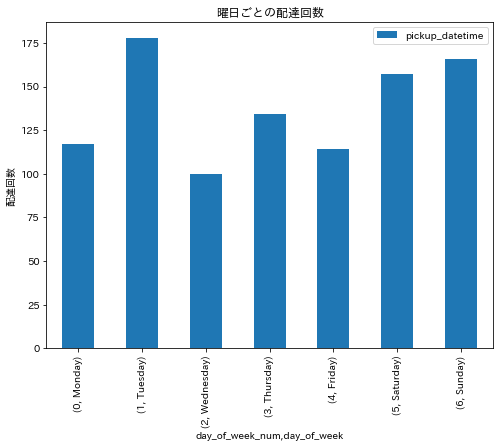

In [23]:
uber_weekdays = df.pivot_table(index=['day_of_week_num','day_of_week'],
                                  values='pickup_datetime',
                                  aggfunc='count')
uber_weekdays.plot(kind='bar')
plt.ylabel('配達回数')
plt.title('曜日ごとの配達回数')

Text(0.5, 1.0, '日にちごとの配達回数')

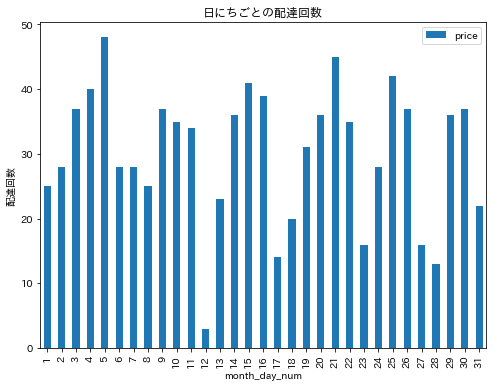

In [24]:
uber_monthdays = df.pivot_table(index=['month_day_num'],
                                  values='price',
                                  aggfunc='count')
uber_monthdays.plot(kind='bar')
plt.ylabel('配達回数')
plt.title('日にちごとの配達回数')

Text(0.5, 1.0, '時間ごとの配達回数')

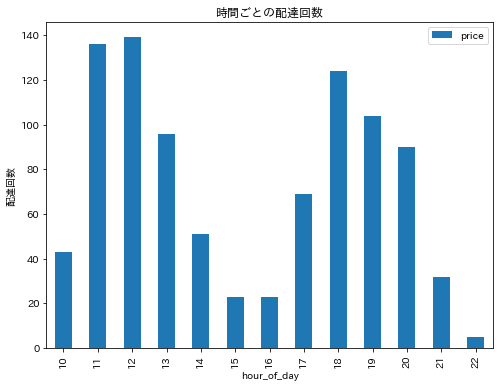

In [25]:
uber_hour = df.pivot_table(index=['hour_of_day'],
                                  values='price',
                                  aggfunc='count')
uber_hour.plot(kind='bar')
plt.ylabel('配達回数')
plt.title('時間ごとの配達回数')

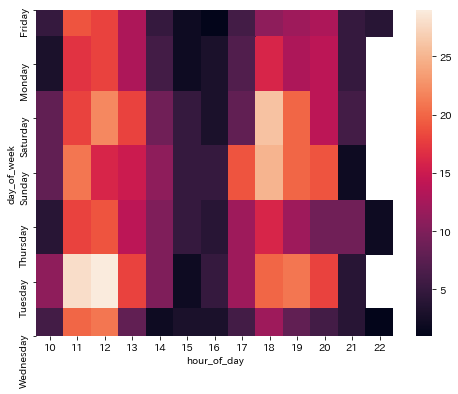

In [26]:
def count_rows(rows):
    return len(rows)

by_cross = df.groupby('day_of_week hour_of_day'.split()).apply(count_rows).unstack()
sns.heatmap(by_cross)

## 